In [1]:
print("""
FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159

Modelling and Analysis of Complex Networks
Assignment 5
Number of the dataset : 5
""")


FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159

Modelling and Analysis of Complex Networks
Assignment 5
Number of the dataset : 5



#LIBRARIES AND DATA LOADING

In [2]:
import networkx as nx
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Correct URLs pointing to the raw files on GitHub
facebook_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Facebook-Ego/686.edges"
twitter_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Twitter-Ego/1435461.edges"

# Download the Facebook-Ego network file
urllib.request.urlretrieve(facebook_url, "facebook.edges")
# Load the Facebook-Ego network as an undirected graph
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Download the Twitter-Ego network file
urllib.request.urlretrieve(twitter_url, "twitter.edges")
# Load the Twitter-Ego network as a directed graph
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

## a) Choose ten nodes and return subgraphs

Creation and visualization of the subgraph for Facebook:  



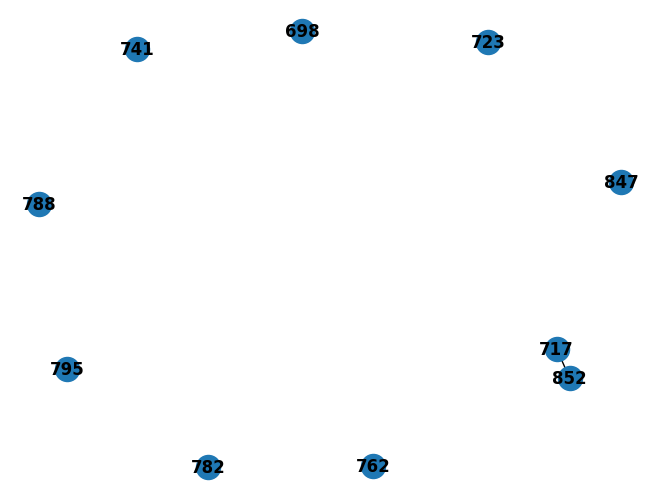

--------------------------------------------------------------------------------------
Creation and visualization of the subgraph for Twitter:  



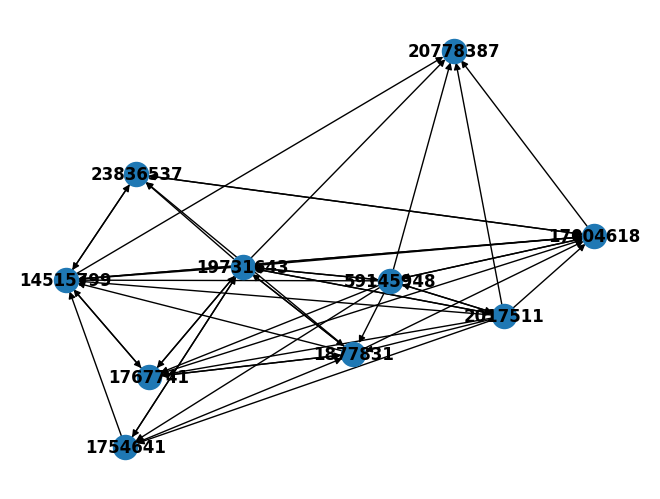

In [4]:
#Let us first define our functions to create and visualize it

def creation_visualization_subgraph(network, num_nodes = 10, visualize = True):

   #convert set of nodes to a list
   all_nodes = list(network.nodes())

   #choose ten nodes randomly
   selected_nodes = random.sample(all_nodes, num_nodes)

   # create a subgraph
   subgraph = network.subgraph(selected_nodes)

   # visualize a subgraph
   if visualize :
      nx.draw(subgraph, with_labels = True, font_weight = 'bold')
      plt.show()

   return subgraph

#Output showing
print("Creation and visualization of the subgraph for Facebook:  \n")
subgraph_facebook = creation_visualization_subgraph(facebook_network)


print("--------------------------------------------------------------------------------------")

print("Creation and visualization of the subgraph for Twitter:  \n")
subgraph_twitter = creation_visualization_subgraph(twitter_network)

## b) List of 3 algorithms for community detection

In [5]:
print ("""
Three algorithms that we can use for community detection are:


1. Label propagation algorithm(LPA): This algorithm works by assigning each node in the network to a community based on the communities of its neighbors,
   and then iteratively updating the community assignments until convergence.


2. Girvan-Newman algorithm: This algorithm works by iteratively removing edges from the network based on their betweenness centrality,
   which is a measure of how important an edge is for connecting different parts of the network.


3. Louvain algorithm: This is a popular algorithm for community detection that optimizes modularity,
   a measure of the quality of a partition of a network into communities.

""")


Three algorithms that we can use for community detection are:


1. Label propagation algorithm(LPA): This algorithm works by assigning each node in the network to a community based on the communities of its neighbors, 
   and then iteratively updating the community assignments until convergence.


2. Girvan-Newman algorithm: This algorithm works by iteratively removing edges from the network based on their betweenness centrality,
   which is a measure of how important an edge is for connecting different parts of the network.


3. Louvain algorithm: This is a popular algorithm for community detection that optimizes modularity,
   a measure of the quality of a partition of a network into communities.      




##c) plot graphs to show the communities based on community dection algorithms previously listed:

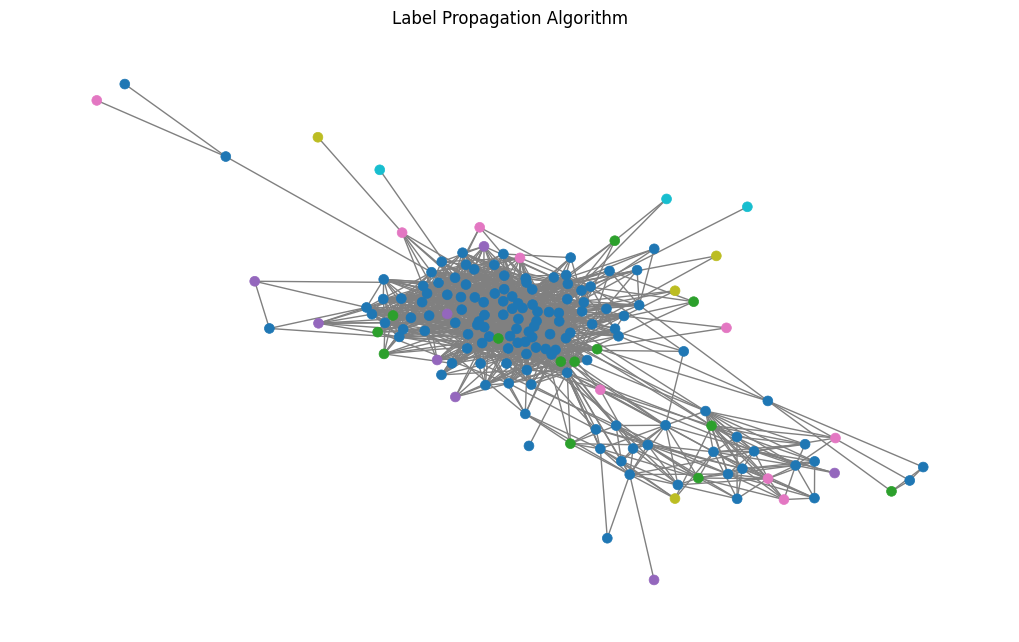

In [12]:
# 1.LABEL PROPAGATION ALGORITHM:

from networkx.algorithms.community import  label_propagation_communities

# Apply Label Propagation algorithm
communities_label_propagation = list(label_propagation_communities(facebook_network))

# Plot Label Propagation communities
plt.figure(figsize=(10, 6))
node_colors_label_propagation = [i for i, comm in enumerate(communities_label_propagation) for _ in comm]
nx.draw(
    facebook_network,
    node_color=node_colors_label_propagation,
    with_labels=False,
    cmap=plt.get_cmap('tab10'),
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Label Propagation Algorithm")
plt.show()


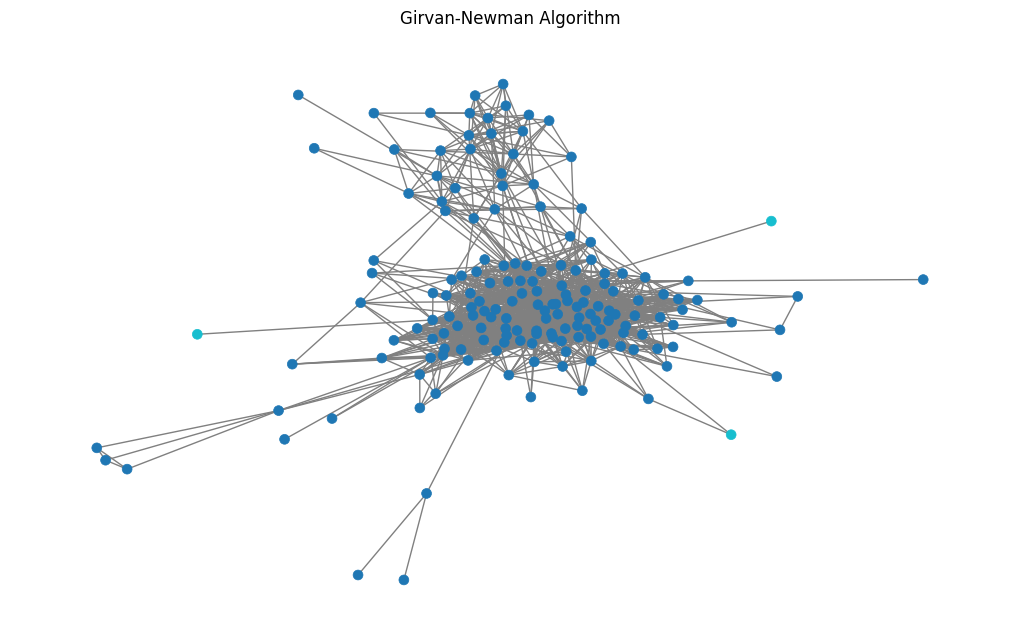

In [13]:
# 2. GIRVAN-NEWMAN ALGORITHM:
from networkx.algorithms.community import girvan_newman

# Apply Girvan-Newman algorithm
communities_girvan_newman = next(girvan_newman(facebook_network))

# Plot Girvan-Newman communities
plt.figure(figsize=(10, 6))
node_colors_girvan_newman = [i for i, comm in enumerate(communities_girvan_newman) for _ in comm]
nx.draw(
    facebook_network,
    node_color=node_colors_girvan_newman,
    with_labels=False,
    cmap=plt.get_cmap('tab10'),
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Girvan-Newman Algorithm")
plt.show()


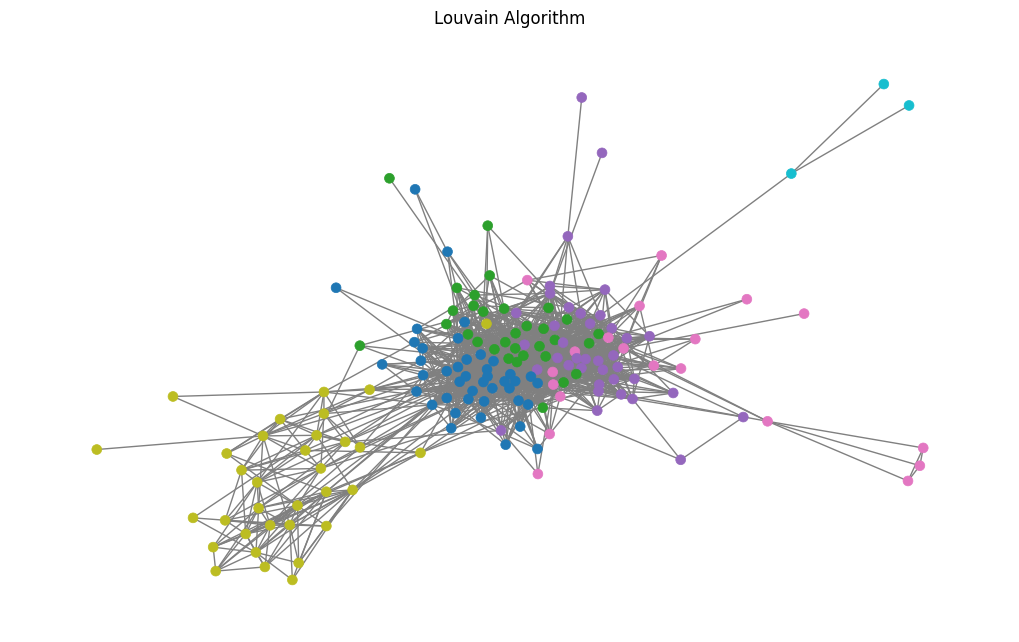

In [17]:
# 3. LOUVAIN ALGORITHM:

import community as community_louvain

# Apply Louvain algorithm
partition_louvain = community_louvain.best_partition(facebook_network)

# Plot Louvain communities
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(facebook_network)
node_colors_louvain = [partition_louvain[node] for node in facebook_network.nodes()]
nx.draw(
    facebook_network,
    pos,
    node_color=node_colors_louvain,
    with_labels=False,
    cmap=plt.get_cmap('tab10'),
    node_size=50,
    linewidths=0.5,
    edge_color = 'gray'
)
plt.title("Louvain Algorithm")
plt.show()


## d) Differences between the community detection results shown in (c) and the possible reasons

In [19]:
print("""
Differences Between Community Detection Results (Label Propagation, Girvan-Newman, Louvain):

-Label Propagation Algorithm:
Result:
This algorithm produces more diffuse and overlapping communities. There are many small clusters, particularly on the outskirts, but the central region remains dense, and the separation between communities isn't as clear.
Reason:
Label Propagation works by iteratively updating each node’s label based on the majority label of its neighbors. Since it’s driven by local interactions, the method is fast but tends to result in fuzzier boundaries, especially in densely connected regions where many labels are competing. It’s more likely to show soft partitions between groups rather than clear separations.

-Girvan-Newman Algorithm:
Result:
The Girvan-Newman algorithm creates smaller, more distinct clusters. The plot shows nodes spread out into several smaller communities, and the division between these communities is relatively clear.
Reason:
This method works by removing edges with high betweenness centrality (those that lie on many shortest paths) until the network breaks apart. It is focused on identifying bridge edges that connect communities, which leads to a more precise segmentation of the network but can also over-segment it, creating more fragmented clusters.

-Louvain Algorithm:
Result:
The Louvain algorithm yields larger, well-defined clusters with strong boundaries. The communities are clear and more cohesive, with better modularity.
Reason:
Louvain maximizes modularity, a measure of how well the network is divided into communities, by iteratively grouping nodes that maximize the internal density of edges. This approach leads to well-separated and larger communities compared to the Girvan-Newman algorithm, which tends to break the network into smaller pieces. Louvain’s strength lies in identifying large, cohesive groups.


Possible Reasons for the Differences:

*Algorithmic Approach:
-Label Propagation is a local and fast method, leading to less distinct and more overlapping communities.
-Girvan-Newman focuses on removing edges that connect communities, often leading to smaller and more fragmented clusters.
-Louvain seeks to optimize modularity, leading to larger and more cohesive clusters, better defining community boundaries.

*Network Structure:
In a densely connected central network, Label Propagation might struggle to find sharp divisions, while Girvan-Newman will break up these regions more efficiently by removing central edges.
Louvain will focus on areas where modularity can be maximized, favoring the formation of larger communities.

*Speed vs. Accuracy Trade-offs:
-Label Propagation is fast but may sacrifice accuracy in defining community boundaries.
-Girvan-Newman is slower but provides a more granular community structure.
-Louvain balances speed and accuracy, favoring well-separated communities.



In conclusion, the Label Propagation algorithm finds fast and fuzzy clusters, Girvan-Newman is ideal for detailed segmentation into smaller groups, and Louvain is optimal for identifying larger,
well-defined communities. These differences arise due to the distinct methods each algorithm uses to detect communities in the network.

""")


Differences Between Community Detection Results (Label Propagation, Girvan-Newman, Louvain):

-Label Propagation Algorithm:
Result:
This algorithm produces more diffuse and overlapping communities. There are many small clusters, particularly on the outskirts, but the central region remains dense, and the separation between communities isn't as clear.
Reason:
Label Propagation works by iteratively updating each node’s label based on the majority label of its neighbors. Since it’s driven by local interactions, the method is fast but tends to result in fuzzier boundaries, especially in densely connected regions where many labels are competing. It’s more likely to show soft partitions between groups rather than clear separations.

-Girvan-Newman Algorithm:
Result:
The Girvan-Newman algorithm creates smaller, more distinct clusters. The plot shows nodes spread out into several smaller communities, and the division between these communities is relatively clear.
Reason:
This method works by 